<a href="https://colab.research.google.com/github/DiaHere/U.S.-Cities-Parks-Recreation-Data/blob/main/Cluster_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

- Dataset: data about parks in 100 popular cities in the United Stataes. The data was derived from the Trust of Public Land and has been redunced by professor Jordan.
- Purpose: Create cluster analysis of those parks by first preparing the data, visualize it, then interpret it

In [40]:
# Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [2]:
# Uploading the data
df = pd.read_csv('parks_data_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        100 non-null    object 
 1   Population                  100 non-null    float64
 2   Acres per 1,000 people      100 non-null    float64
 3   Parks per 10,000 residents  100 non-null    float64
 4   Parks as % City Area        100 non-null    float64
 5   Fields/ Diamonds            100 non-null    float64
 6   Tennis_dedicdated           100 non-null    float64
 7   Pickleball_dedicated        100 non-null    float64
 8   Pickleball_combined         100 non-null    float64
 9   Hoops                       100 non-null    float64
 10  Community_garden_sites      100 non-null    float64
 11  Dog_parks                   100 non-null    float64
 12  Playgrounds                 100 non-null    float64
 13  Rec_senior_centers          100 non-

In [3]:
df

,City,Population,"Acres per 1,000 people","Parks per 10,000 residents",Parks as % City Area,Fields/ Diamonds,Tennis_dedicdated,Pickleball_dedicated,Pickleball_combined,Hoops,Community_garden_sites,Dog_parks,Playgrounds,Rec_senior_centers,Restrooms,Skateparks,Splashpads,Swimming_pools,Disc_golf_courses,investment_dollars
0,"Albuquerque, NM",553345.0,38.905204,5.692651,0.189322,3.560166,3.397519,1.012027,2.891505,5.060134,0.000000,3.975820,3.307159,1.120458,1.301177,0.000000,0.903595,0.000000,0.000000,220.434307
1,"Anaheim, CA",345538.0,13.344408,1.881125,0.143306,2.604634,1.504900,1.447019,1.447019,1.504900,0.011576,1.157615,1.736423,0.289404,1.736423,2.604634,0.578808,0.000000,0.000000,76.151009
2,"Anchorage, AK",288464.0,3022.196184,7.765267,0.801559,3.154640,2.357313,0.693327,0.693327,1.975983,0.017333,2.773310,3.119973,0.207998,1.559987,1.733319,0.000000,1.733319,0.693327,68.927449
3,"Arlington, TX",397158.0,10.869729,2.517890,0.070975,2.366816,1.208587,0.553936,1.410018,7.830637,0.002518,0.755367,4.230055,0.654651,1.938775,1.007156,2.014312,1.510734,0.503578,112.913565
4,"Arlington, VA",245695.0,7.263477,6.023729,0.112112,4.436395,7.326156,0.000000,1.628035,17.094365,0.040701,4.070087,5.453916,1.221026,2.401351,0.407009,2.849061,2.035043,0.407009,260.647703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Tulsa, OK",416599.0,19.502447,3.264530,0.065091,5.760936,5.664920,0.768125,0.864140,2.928476,0.007201,0.720117,4.320702,0.384062,1.368222,1.200195,8.401364,1.200195,2.160351,75.332502
96,"Virginia Beach, VA",461744.0,55.963911,0.021657,0.165060,2.425586,2.685471,2.468901,2.468901,7.103503,0.000000,1.082851,5.284313,0.303198,1.191136,0.649711,0.216570,1.515992,0.649711,107.815311
97,"Washington, DC",698878.0,13.294738,3.419767,0.238217,2.189223,5.008027,0.429259,1.030223,6.968312,0.221784,2.718643,2.017520,2.003211,2.847421,0.858519,5.294200,4.721854,0.143086,485.292066
98,"Wichita, KS",381998.0,10.731077,3.036665,0.040266,2.827240,3.455515,1.623045,1.623045,3.219912,0.005236,1.308907,2.277499,0.471207,2.094252,1.047126,3.141378,1.570689,1.832470,82.474460




---



# **PART 1**: Cluster Analysis of Parks & Facilities Data

*   **Creating k-means and hierarchical clustering analysis**

# **K-means Cluster Analysis**

*   **Question:** whats the difference in numbers between Hoop and Pickleball_combined in those cities?
*   **Features:**

  *   'Hoops': The number of basketball hoops (not courts) per 10,000 residents
  *   'Pickleball_combined': The number of pickleball/tennis combined courts per 20,000 residents




# Prepare the Data

**Hoops are calculated per 10,000 resident while Pickleball_combined is caluculated per 20,000.**

*Now make it equal*

In [49]:
# Multiplying Hoops by 2 to make it per 20,000 residents
df['Hoops'] = df['Hoops'] * 2
df['Hoops']

,Hoops
0,20.240537
1,6.019598
2,7.903933
3,31.322547
4,68.377460
...,...
95,11.713902
96,28.414013
97,27.873248
98,12.879649


In [50]:
#Observing the two features
df_features = df[['Hoops','Pickleball_combined']].copy()
df_features.head(10)

,Hoops,Pickleball_combined
0,20.240537,2.891505
1,6.019598,1.447019
2,7.903933,0.693327
3,31.322547,1.410018
4,68.377460,1.628035
5,15.584255,1.890170
6,7.663422,0.919611
7,9.736348,0.842174
8,9.418093,3.155547
9,15.617265,0.488040


**The values seems to not be scalled correctly/equally to the standard deviation.**


*Normalizing the two features to make the scatterplot possible*

In [6]:
df_features['Hoops_scaled'] = df_features['Hoops'] / df_features['Hoops'].std()
df_features['Pickleball_combined_scaled'] = df_features['Pickleball_combined'] / df_features['Pickleball_combined'].std()
df_features[['Hoops_scaled','Pickleball_combined_scaled']].head(10)

,Hoops_scaled,Pickleball_combined_scaled
0,1.333337,2.638993
1,0.396539,1.320652
2,0.520668,0.632780
3,2.063360,1.286883
4,4.504337,1.485860
5,1.026607,1.725103
6,0.504825,0.839302
7,0.641378,0.768627
8,0.620413,2.879976
9,1.028781,0.445420


# Clustering

**k-means clustering analysis**

*Figure out the number clusters using hte elbow plot method*

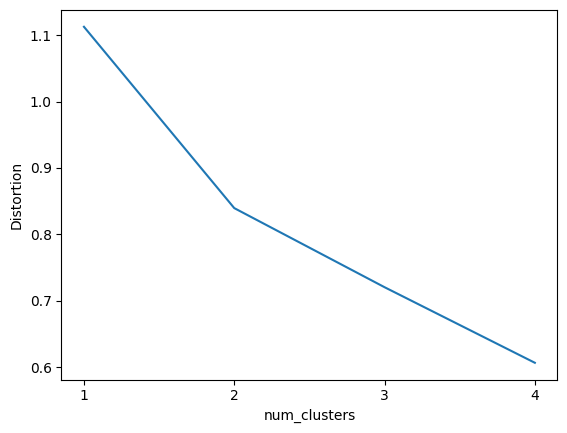

In [7]:
distortions = [] # the list of disortion between every cluster center
num_clusters = range(1,5) # a range of numbers

for i in num_clusters:
  cluster_center, distortion = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], i)
  distortions.append(distortion) # addes the distortions distance from different numbers of clusters possiblities

elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'Distortion': distortions}) # create an elbow plot dataframe

#finding the most optimal number of clusters based on the distortion
sns.lineplot(x = 'num_clusters', y = 'Distortion', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Most optimal number of clusters is 2**

*Using the number, I can create the cluster centers and the labels for the graph*

In [47]:
cluster_centers, distortions = kmeans(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], 2) #Creating 2 clusters

df_features['cluster_labels'], distortions = vq(df_features[['Hoops_scaled', 'Pickleball_combined_scaled']], cluster_centers) #Labeling the clusters

*Now, create the graph of those clusters*

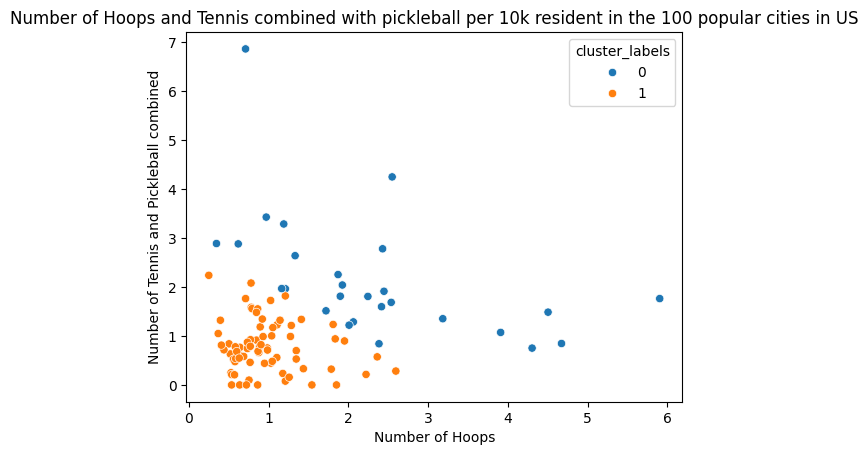

In [48]:
sns.scatterplot(x = 'Hoops_scaled', y = 'Pickleball_combined_scaled', hue = df_features['cluster_labels'],
                data = df_features[['Hoops_scaled', 'Pickleball_combined_scaled']]) #Creating a scatterplot of the clusters
#Editing the plot
plt.xlabel('Number of Hoops')
plt.ylabel('Number of Tennis and Pickleball combined')
plt.title('Number of Hoops and Tennis combined with pickleball per 10k resident in the 100 popular cities in US')
plt.show()

**Interpretations:**


*   It mostly ranges from 1 - 3 hoops and pickleball equally for most cities
*   However, as the number of hoops increase (which is present for couple of cities only), there is less pickleball combined - a weak negative correlation







---



# **hierarchical Clustering Analysis**



*   **Question:** Does the number of senior centers increase as the investemnt money increase and vice versa? Is there a possitive correlation between the two?
*   **Features:**
  *     'Rec_senior_centers': Recreation and Senior Center facilities per 20,000 residents
  *      'Investment_dollars': The amount spent, annually, on parks per resident, adjusted for cost of living differences, and including volunteer hours






# Prepare the Data

**Investment_dollars is measured per resident while the Rec_senior_centers per 20,000 resident***

**Lets equlize them by multiplying the invested money by 20,000**

In [29]:
#Creating a dataframe for those features only
df_features2 = df[['investment_dollars', 'Rec_senior_centers']].copy()
df_features2

,investment_dollars,Rec_senior_centers
0,220.434307,1.120458
1,76.151009,0.289404
2,68.927449,0.207998
3,112.913565,0.654651
4,260.647703,1.221026
...,...,...
95,75.332502,0.384062
96,107.815311,0.303198
97,485.292066,2.003211
98,82.474460,0.471207


In [30]:
#equlizing the scale
df_features2['investment_dollars_per_20k'] = df_features2['investment_dollars'] * 20000
df_features2

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k
0,220.434307,1.120458,4.408686e+06
1,76.151009,0.289404,1.523020e+06
2,68.927449,0.207998,1.378549e+06
3,112.913565,0.654651,2.258271e+06
4,260.647703,1.221026,5.212954e+06
...,...,...,...
95,75.332502,0.384062,1.506650e+06
96,107.815311,0.303198,2.156306e+06
97,485.292066,2.003211,9.705841e+06
98,82.474460,0.471207,1.649489e+06


In [31]:
df_features2.describe()

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k
count,100.000000,100.000000,1.000000e+02
mean,155.457990,0.918374,3.109160e+06
std,126.480333,0.556556,2.529607e+06
min,23.093246,0.175745,4.618649e+05
25%,93.195634,0.493665,1.863913e+06
50%,126.808236,0.773213,2.536165e+06
75%,184.703603,1.222209,3.694072e+06
max,1067.040552,3.166478,2.134081e+07


**To be able to cluster, I have to normalize the values from 0 to 1 to have the same scale**

In [32]:
#Normalize the two features
df_features2['investment_dollars_per_20k_scaled'] = df_features2['investment_dollars_per_20k'] / df_features2['investment_dollars_per_20k'].std()
df_features2['Rec_senior_centers_scaled'] = df_features2['Rec_senior_centers'] / df_features2['Rec_senior_centers'].std()
df_features2

,investment_dollars,Rec_senior_centers,investment_dollars_per_20k,investment_dollars_per_20k_scaled,Rec_senior_centers_scaled
0,220.434307,1.120458,4.408686e+06,1.742835,2.013198
1,76.151009,0.289404,1.523020e+06,0.602078,0.519990
2,68.927449,0.207998,1.378549e+06,0.544966,0.373724
3,112.913565,0.654651,2.258271e+06,0.892736,1.176253
4,260.647703,1.221026,5.212954e+06,2.060777,2.193895
...,...,...,...,...,...
95,75.332502,0.384062,1.506650e+06,0.595606,0.690069
96,107.815311,0.303198,2.156306e+06,0.852427,0.544776
97,485.292066,2.003211,9.705841e+06,3.836897,3.599295
98,82.474460,0.471207,1.649489e+06,0.652073,0.846647


# Cluster

**Hierarchical cluster analysis**

In [34]:
#Figuring out the distance matrix using linkage
distance = linkage(df_features2[['investment_dollars_per_20k_scaled','Rec_senior_centers_scaled']], method = 'ward', metric = 'euclidean')

**Before labeling the clusters, I need to figure out the number of clusters using a dendogram**

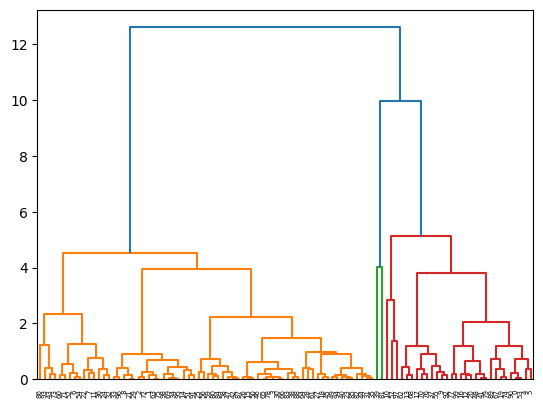

In [41]:
dendrogram(distance)

**The most optimal number of cluster based on the dendrogram is 3**

*Now create the cluster labels*

In [44]:
df_features2['cluster_labels'] = fcluster(distance, 3, criterion='maxclust')

*Creating the scatterplot based on the cluster labels*

Text(0.5, 1.0, 'Money Invested and Recreational & Senior Centers Ratio per 20k resident in 100 popular cities in US')

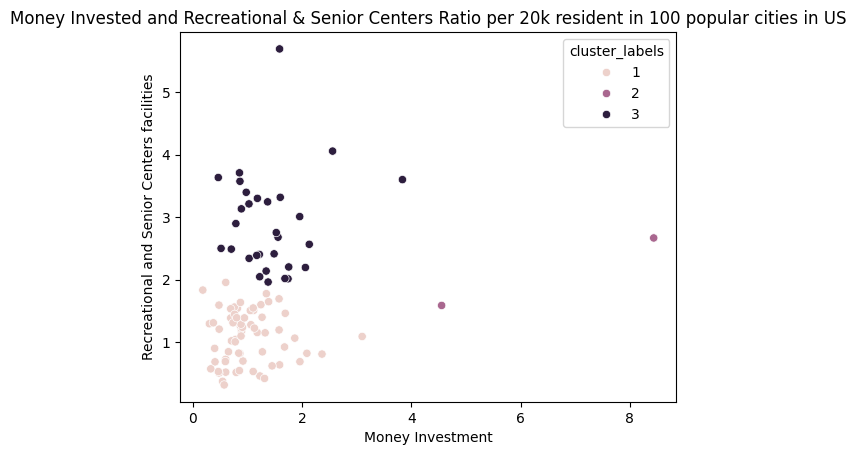

In [53]:
sns.scatterplot(x = 'investment_dollars_per_20k_scaled', y = 'Rec_senior_centers_scaled', hue = 'cluster_labels',
                data = df_features2) #Create the scatter plot with the cluster labeling
#Editing the plot
plt.xlabel('Money Investment')
plt.ylabel('Recreational and Senior Centers facilities')
plt.title('Money Invested and Recreational & Senior Centers Ratio per 20k resident in 100 popular cities in US')

**interpretations**:


*   There are two groups of cities with the same amount of money invested (0-2) that have different ratios between the two features: cluster two has a Recreational and Senior Center facilities 0 - 2; on the other side, cluster three has from 2-4.
*   So therefore, cluster two has either fewer Senior citizen or the cities are not investing enough money for recreational/senior centeres facilities
